# Introduction

These calculations ....

## About thes Calculations

These calculations are compiled in Jupyter Labs using Python. The calculations use some Classes developed by Structensor Consulting Ltd to make structural design efficient and transparent. If required the source code of these calculations can be provided to checking authorities. 

The calculations are undertaken in accordacne with limit state design principles in accordance with BS EN 1990. In addition, the following standards are used within the calculations:

BS EN 1991-1-1

## Project Description

Add information about the project and the brief here.

## Structural Principles

Add descriptions and assumptions about the structure here. 


# Snow loading

The following calulations are undertaken in accordance with BS EN 1991-1-3 and the associated UK National Annex (NA).

The calculations make use of the Structensor modules for snow loading

In accordance with the NA $C_e=1$ and $C_t=1$. Exception snow loads are not considered.

Snow load on the ground $(s_k)$ is given by NA.1:

$$ s_k=(0.15+(0.10 Z + 0.05)) + \left(\frac{A-100}{525}\right) $$

Where $A$ is the alitude above mean sea level and $Z$ the snow zone from Figure NA.1

The snow load on the roof $(s)$ is calculated from:

$$s = \mu_i C_e C_t s_k$$

Where $\mu_i$ is the snow shape coefficient for the specif roof type. Note that this snow loading is applied on plan.

Where the snow load in a valley is calculated BS EN 1991-1-3 NA B2 is used such that the snow shape coefficient is the minimum of:

\begin{align}
&\mu_1 = \frac{2h}{s_k}\\
&\mu_1 = \frac{2b_3}{l_{s1} + l_{s2}}\\
&\mu_2 = 5
\end{align}

For canopy snow loading the shape coefficient is taken as the lesser of:

\begin{align}
&\mu_1 =\frac{2h}{s_k}\\
&\mu_1 = 5
\end{align}

In [1]:
# import the snow module
import snow

In [2]:
s = snow.Snow(pitch=25.0, pitch_type='duo', Z=4.0, Alt=80.0)
s.basic_loading()
s.valley()
s.canopy(h=1, b1=3)

Snow load on the ground = 0.56kPa
The snow shape coefficient = 1.07
The snow load = 0.60kPa
The valley snow shape coefficient = 3.00
The peak valley snow load = 1.69kPa
The canopy snow shape coeffeicient = 3.56
The peak canopy snow load = 2.00kPa


# General Loadiong

In [3]:
from loading import *

# define a bespoke value for snow load
Load.var_loads['Snow'] = 0.60

## Weight of materials

The following weights of materials are used in the structural design in accordance with BS EN 1990.

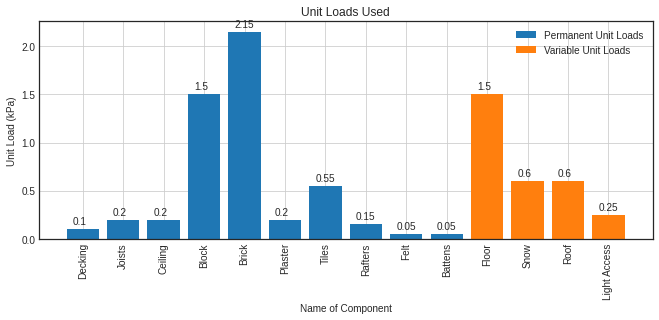

In [4]:
Load.print_component_loads()

## Element loading

Elements of the structure have permanent and variable loads as calculated from the above by summing the relevent components. 


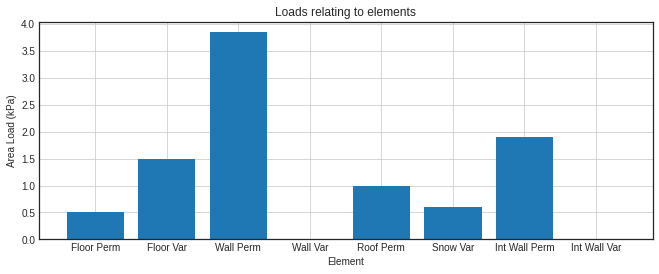

In [5]:
# calculate the loads of building elements
floor_perm = [Load.sum_components(['Decking', 'Joists', 'Ceiling']), 'Floor Perm']
wall_perm = [Load.sum_components(['Brick', 'Block', 'Plaster']), 'Wall Perm']
floor_var = [Load.var_loads['Floor'], 'Floor Var']
wall_var = [0, 'Wall Var']
roof_perm = [Load.sum_components(['Tiles', 'Felt', 'Battens', 'Rafters', 'Ceiling']), 'Roof Perm']
roof_var = [Load.var_loads['Snow'], 'Snow Var']
intwall_perm = [Load.sum_components(['Block', 'Plaster', 'Plaster']), 'Int Wall Perm']
intwall_var = [0, 'Int Wall Var']

# Plot the calculated loading for the elements
Load.plot_elements([floor_perm, floor_var, wall_perm, wall_var, 
                    roof_perm, roof_var, intwall_perm, intwall_var])

## Member Line Loadings

The calculations below establish line loadings on members of the structure at servicability limit state (SLS) and ultimate limit state (ULS) by comnining the relevant above element loading with the element length support by the member.

### Beam B1

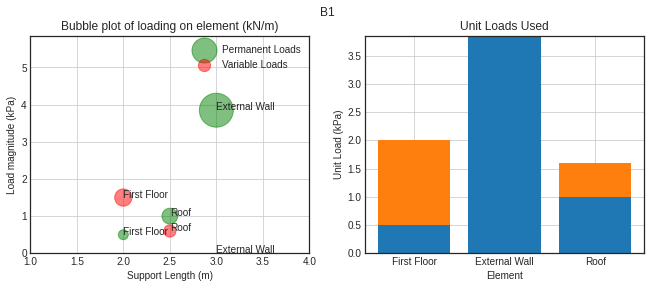

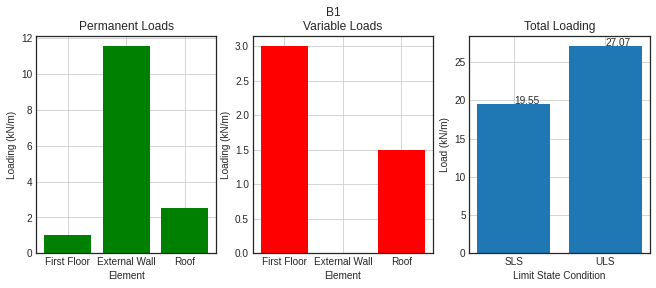

In [6]:
# Set the elements and the supported length of the elements that are to make up the load
floor = [floor_perm[0], floor_var[0], 2, 'First Floor']
wall = [wall_perm[0], wall_var[0], 3, 'External Wall']
roof = [roof_perm[0], roof_var[0], 2.5, 'Roof']

# For an instanace of a line load from the above and perform calculations
w1 = Load(element=[floor, wall, roof], ref='B1')

# Provide a graphical plot of the line load and it components
w1.plot_load_components()